In [1]:
%pylab inline
import IPython

Populating the interactive namespace from numpy and matplotlib



# Filter-Functions

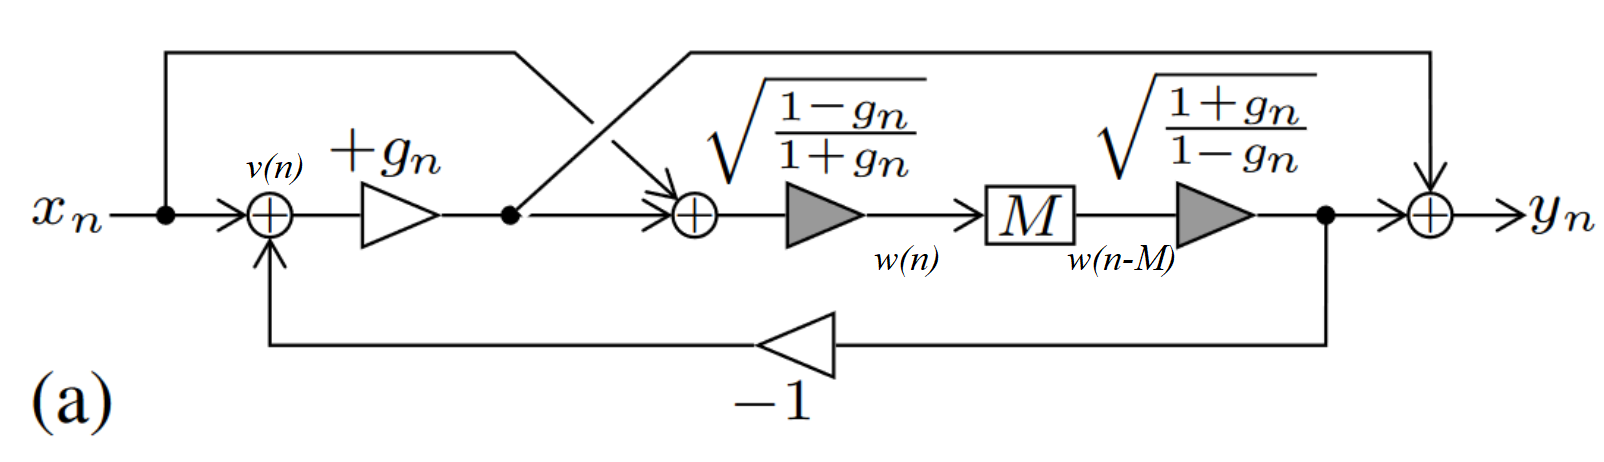

In [2]:
def apA(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt((1-g[n])/(1+g[n]))
        T2[n] = sqrt((1+g[n])/(1-g[n]))

        v[n] = x[n] - w[n-M]* T2[n]
        w[n] = (x[n] + g[n] * v[n]) * T1[n]
        y[n] = g[n] * v[n] + w[n-M]* T2[n]
        
    return y

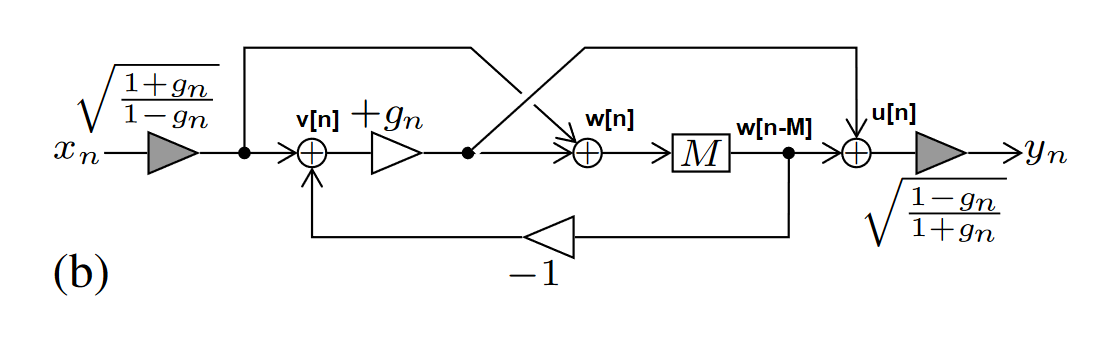

In [3]:
def apB(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt((1-g[n])/(1+g[n]))
        T2[n] = sqrt((1+g[n])/(1-g[n]))

    x = T1* x

    for n in range(N):

        v[n] = x[n] - w[n-M]
        w[n] = x[n] + g[n]*v[n]
        u[n] = g[n] * v[n] + w[n-M]

    y = T2 * u 
    return y

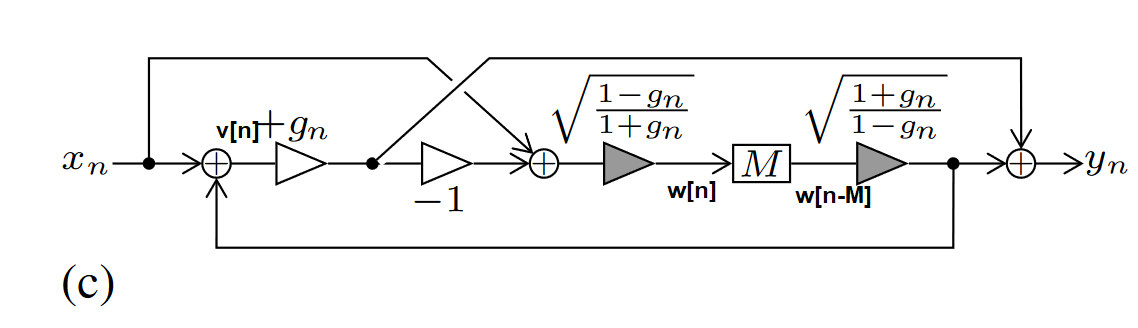

In [4]:
def apC(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt((1+g[n])/(1-g[n]))
        T2[n] = sqrt((1-g[n])/(1+g[n]))

        v[n] = x[n] + w[n-M] * T2[n]
        w[n] = (x[n] - g[n] * v[n]) * T1[n]
        y[n] = g[n] * v[n] + w[n-M] * T2[n]
        
    return y

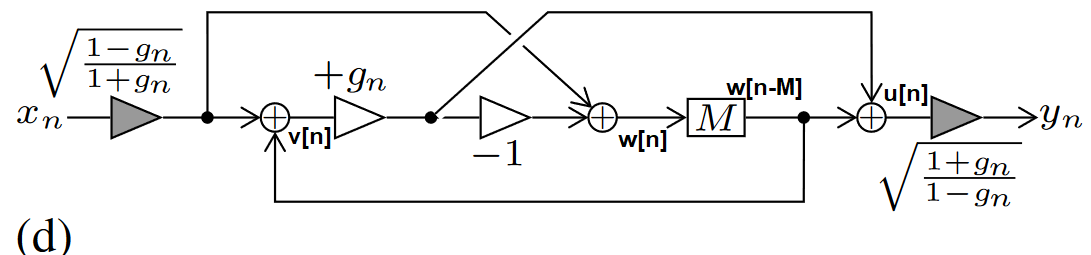

In [5]:
def apD(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt((1+g[n])/(1-g[n]))
        T2[n] = sqrt((1-g[n])/(1+g[n]))

    x = T1 * x

    for n in range(N):
            v[n] = x[n] + w[n-M]
            w[n] = x[n] - g[n] * v[n]
            u[n] = g[n] * v[n] + w[n-M]

    y = T2 * u
    return y

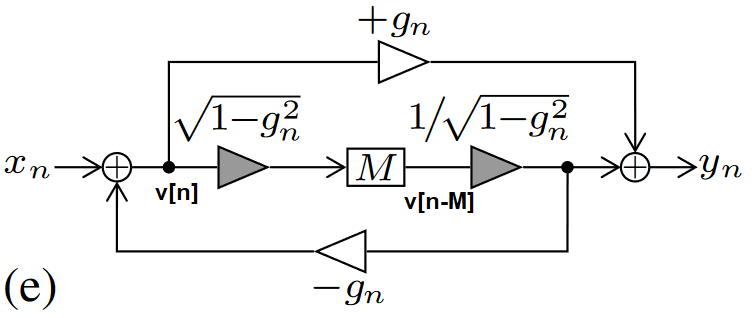

In [6]:
def apE(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt(1-g[n]**2)
        T2[n] = 1/sqrt(1-g[n]**2)

        w[n] = (x[n] - g[n] * w[n-M]*T2[n])*T1[n]
        v[n] = w[n] * g[n] 
        y[n] = v[n]*T2[n] + w[n-M] *T2[n]

    return y

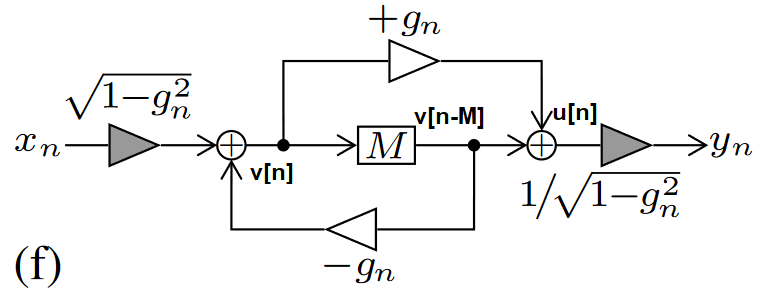

In [7]:
def apF(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt(1-g[n]**2)
        T2[n] = (1/sqrt(1-g[n]**2))

    x = T1* x    

    for n in range(N):

        v[n]=x[n] - g[n]*v[n-M]
        u[n]=(g[n]*v[n] + v[n-M]) 
    
    y = T2 * u
    return y

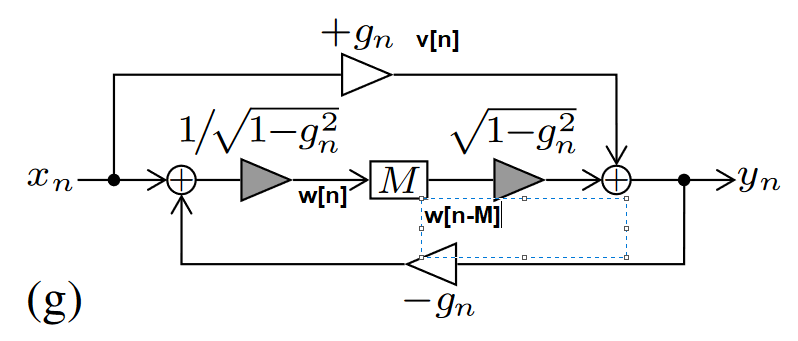

In [8]:
def apG(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):   
    
        T1[n] = (1/sqrt(1-g[n]**2))
        T2[n] = sqrt(1-g[n]**2)

        v[n] = x[n] * g[n] 
        w[n] = (x[n] - g[n] *  (v[n] + w[n-M]*T2[n]))* T1[n]
        y[n] = w[n-M]*T2[n] + v[n]
        
    return y

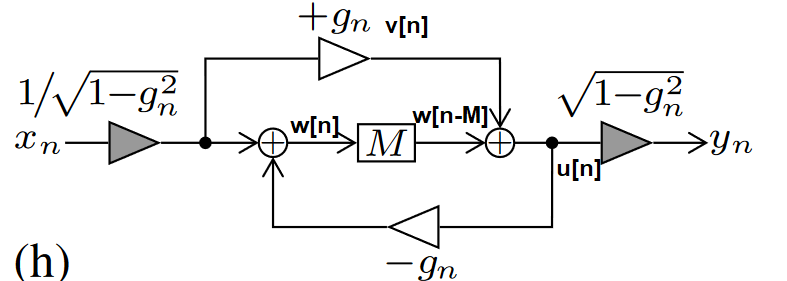

In [9]:
def apH(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = (1/sqrt(1-g[n]**2))
        T2[n] = sqrt(1-g[n]**2)
    
    x = T1 * x
    
    for n in range(N):   
        v[n] = x[n] * g[n] 
        w[n] = x[n] - g[n] *  (v[n] + w[n-M])
        u[n] = w[n-M] + v[n]

    y = T2 * u
    return y

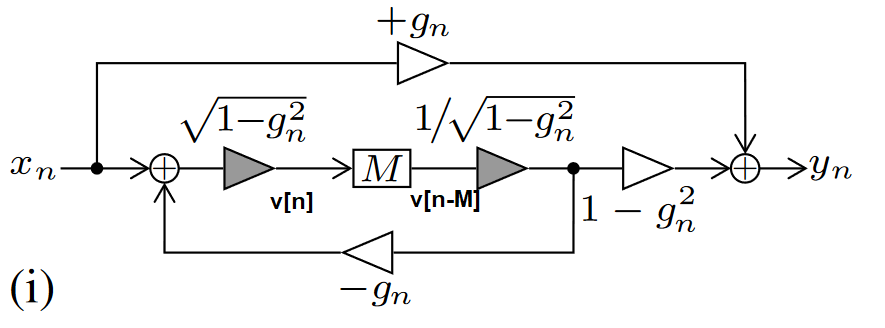

In [10]:
def apI(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
    
        T1[n] = sqrt(1-g[n]**2)
        T2[n] = (1/sqrt(1-g[n]**2))

        v[n] = (x[n] - g[n] * v[n-M]*T2[n]) * T1[n]

        y[n] = v[n-M]* T2[n]*(1-g[n]**2) + x[n] * g[n]
        
    return y

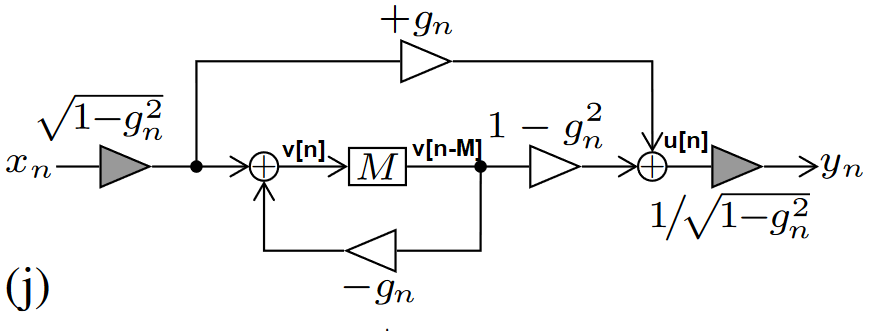

In [11]:
def apJ(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):

        T1[n] = sqrt(1-g[n]**2)
        T2[n] = (1/sqrt(1-g[n]**2))

    x = T1 * x

    for n in range(N):

        v[n] = x[n] - g[n]* v[n-M]
        u[n] = (v[n-M]*(1-g[n]**2)) + x[n] * g[n]

    y = T2 * u 
    return y

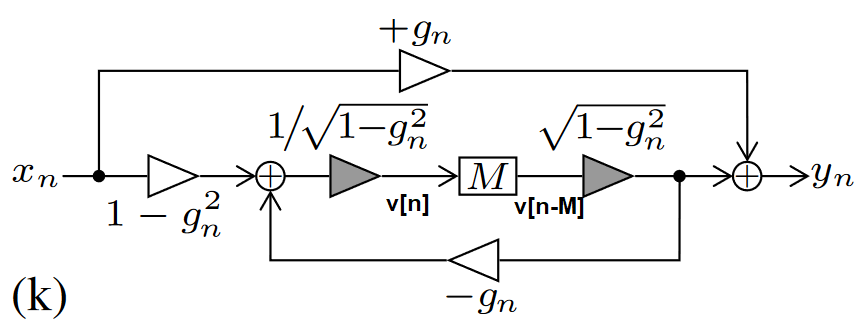

In [12]:
def apK(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T2[n] = sqrt(1-g[n]**2)
        T1[n] = (1/sqrt(1-g[n]**2))

        v[n] = ((x[n]*(1-g[n]**2)) - g[n]* v[n-M]  * T2[n]) * T1[n]
        y[n] = v[n-M]* T2[n] + x[n] * g[n]
        
    return y

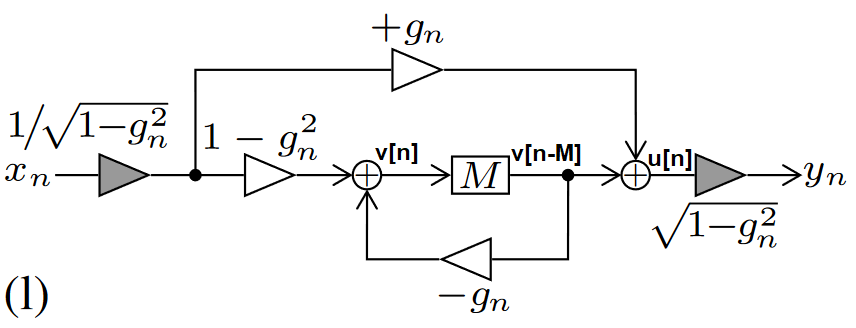

In [13]:
def apL(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        
        T2[n] = sqrt(1-g[n]**2)
        T1[n] = (1/sqrt(1-g[n]**2))

    x = x * T1   

    for n in range(N):

        v[n] = (x[n]*(1-g[n]**2)) - g[n]* v[n-M]
        u[n] = v[n-M]+ x[n] * g[n]

    y = T2 * u
    return y

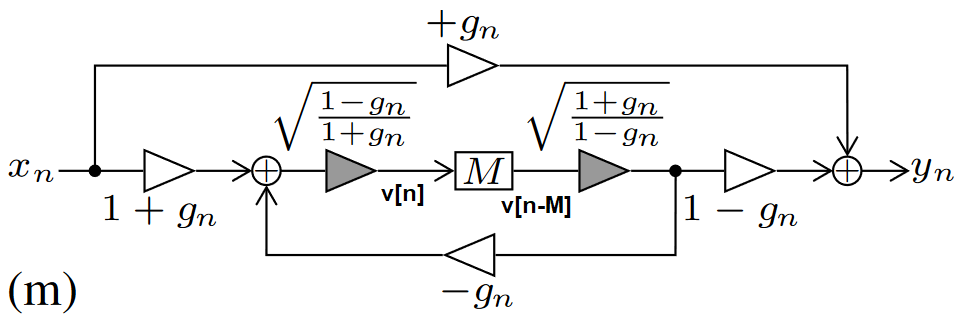

In [14]:
def apM(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):

        T1[n] = sqrt((1-g[n])/(1+g[n]))
        T2[n] = sqrt((1+g[n])/(1-g[n]))

        v[n] = ((x[n]*(1+g[n])) - g[n]* v[n-M] * T2[n]) * T1[n]
        y[n] = v[n-M]* T2[n]*(1-g[n]) + x[n] * g[n] 
        
    return y

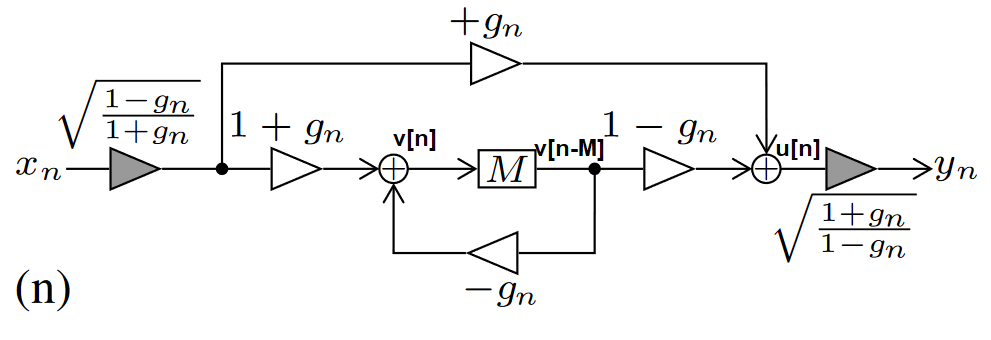

In [15]:
def apN(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt((1-g[n])/(1+g[n]))
        T2[n] = sqrt((1+g[n])/(1-g[n]))

    x = T1 * x

    for n in range(N):

        v[n] = (x[n]*(1+g[n])) - g[n]* v[n-M]
        u[n] = v[n-M]*(1-g[n]) + x[n] * g[n]


    y = T2 * u
    return y

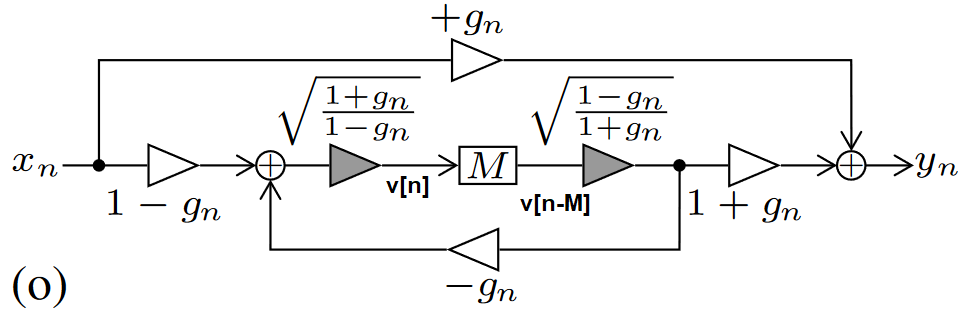

In [16]:
def apO(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt((1+g[n])/(1-g[n]))
        T2[n] = sqrt((1-g[n])/(1+g[n]))

        v[n] = ((x[n]*(1-g[n])) - g[n]* v[n-M]  * T2[n]) * T1[n]
        y[n] = v[n-M]* T2[n]*(1+g[n]) + x[n] * g[n]
        
    return y

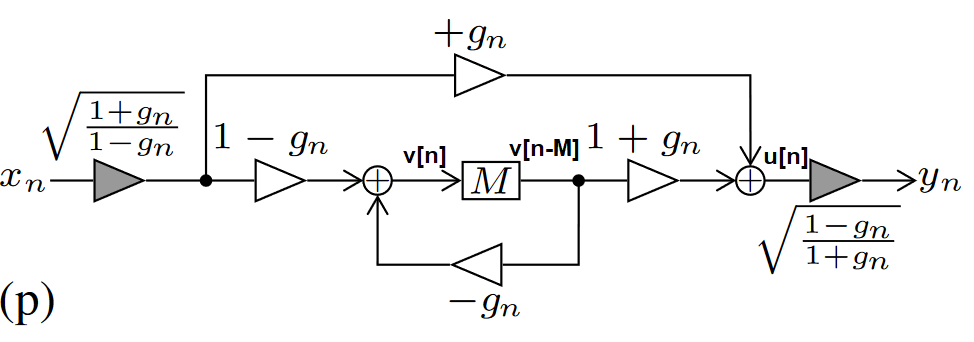

In [17]:
def apP(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt((1+g[n])/(1-g[n]))
        T2[n] = sqrt((1-g[n])/(1+g[n]))

    x = T1* x   

    for n in range(N):

        v[n] = (x[n]*(1-g[n])) - g[n]* v[n-M]
        u[n] = v[n-M]*(1+g[n]) + x[n] * g[n]


    y = T2 * u
    return y

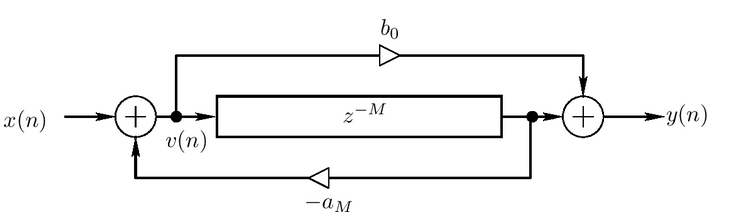

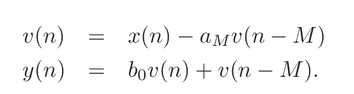

In [18]:
#https://ccrma.stanford.edu/~jos/pasp/Allpass_Two_Combs.html

def apLTI(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)

    for n in range(N):
        
        v[n] = x[n] - g[n] * v[n-M]  
        y[n] = v[n-M] + v[n] * g[n]
        
    return y

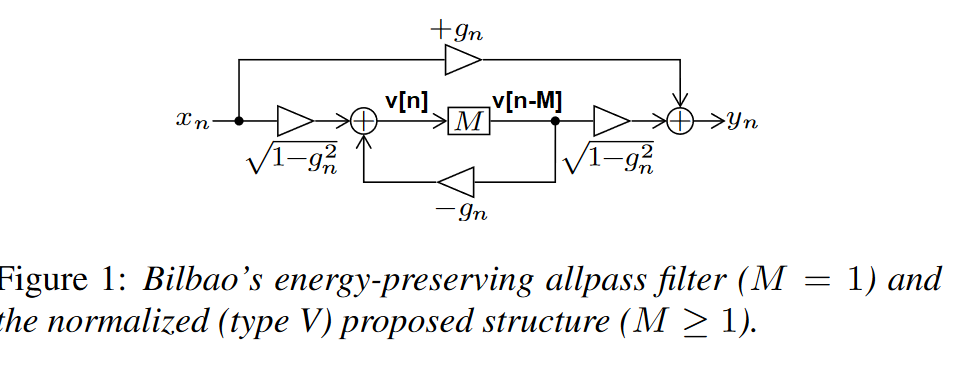

In [19]:
def apV(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)

    for n in range(N):

        v[n] = x[n] * sqrt(1-g[n]**2) - g[n]* v[n-M]
        y[n] = v[n-M] * sqrt(1-g[n]**2) + x[n] * g[n]

    return y

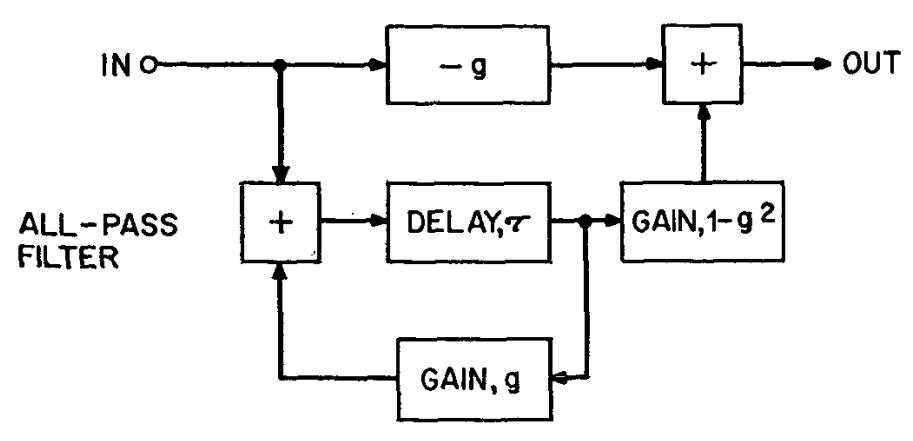

In [20]:
def apS(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)

    for n in range(N):

        v[n] = x[n] + g[n]* v[n-M]
        y[n] = (v[n-M]*(1-g[n]**2)) - x[n] * g[n]

    return y

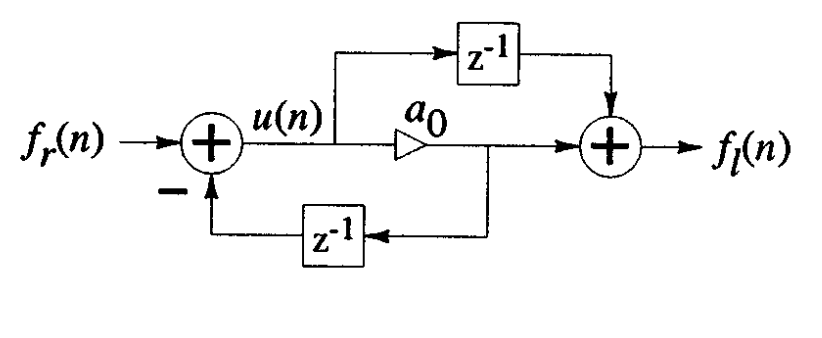

In [21]:
def apNL2(x, M, a1, a2):
    y = zeros_like(x)
    v = zeros_like(x)
    g = zeros_like(x)
    w = zeros_like(x)
    
    for n in range(N):
        
        v[n] = x[n] - w[n]
        g[n] = (v[n]>=0)*a1 + (v[n]<0)*a2
        w[n] = g[n] * v[n-M] 
        y[n] = v[n-M] + v[n] * g[n-1]
              
    return y, g, v

# Allpass-Test

In [22]:
sr = 44100
T = 10
N = T * sr
n = arange(N)
t = n/sr


freqAxis = linspace(0,sr/2,N//2) #x-Axis

x = zeros(N)
x[0] = 1      #impulse

M = 1 #Delaytime


gain = 0.6 #AP-Gain (LTI-Case)
g = zeros_like(x)
g.fill(gain)         #Fill with static Gain (LTI-Case)

noise = (random_sample(N)*2)-1 #AP-Gain - Time-Variyng-Case
#g = noise * 0.9999  #Gain = Noise

f = 10
sine = sin(pi*2*f*t)

## Plot Impulse Response

Text(0.5, 1.0, '$h(n)$')

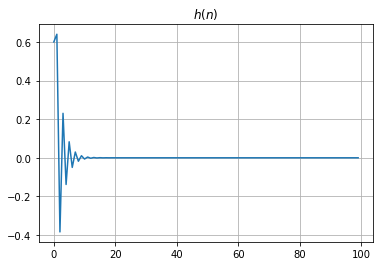

In [23]:
y = apA(x, M, g) #filter-structure

#plot impulse response (first 100 samples)

plot(y[0:100])
grid()
title('$h(n)$')

## Plot Magnitude and Phase Response

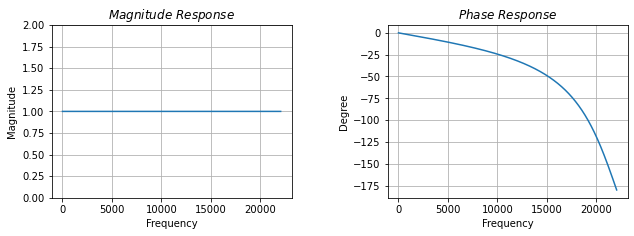

In [24]:
spec = fft.fft(y)[0:N//2] #FFT 

#Magnitude Response
figure(figsize=[10,3])
subplot(121)
plot(freqAxis,abs(spec))
plt.xlabel('Frequency')
plt.ylabel('Magnitude', labelpad=5)
ylim([0, 2])
title('$Magnitude$ $Response$')
grid()

#Phase Response
subplot(122)
plot(freqAxis,angle(spec, deg = True))
plt.xlabel('Frequency')
plt.ylabel('Degree')
title('$Phase$ $Response$')
grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9, wspace=0.4,hspace=0.4)                

## apNL() - Plot Modulation SIgnal and v(n)

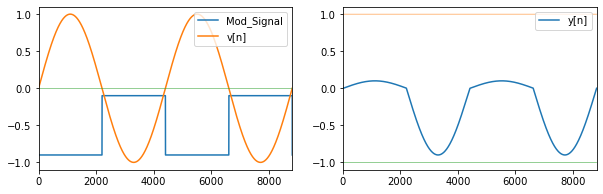

In [25]:
a1 = -0.9
a2 = -0.1
M = 1
y = apNL2(sine, 1, a1, a2)

figure(figsize=[10,3])
subplot(121)
plot(y[1], label ='Mod_Signal')
plot(y[2], label ='v[n]')
plot(zeros(N), linewidth=0.5)
xlim([0,4410*2])
legend(loc='upper right')

subplot(122)
plot(y[0], label = 'y[n]')
plot(ones(N), linewidth=0.5)
plot(ones(N)*-1, linewidth=0.5)
xlim([0,4410*2])
legend(loc='upper right')

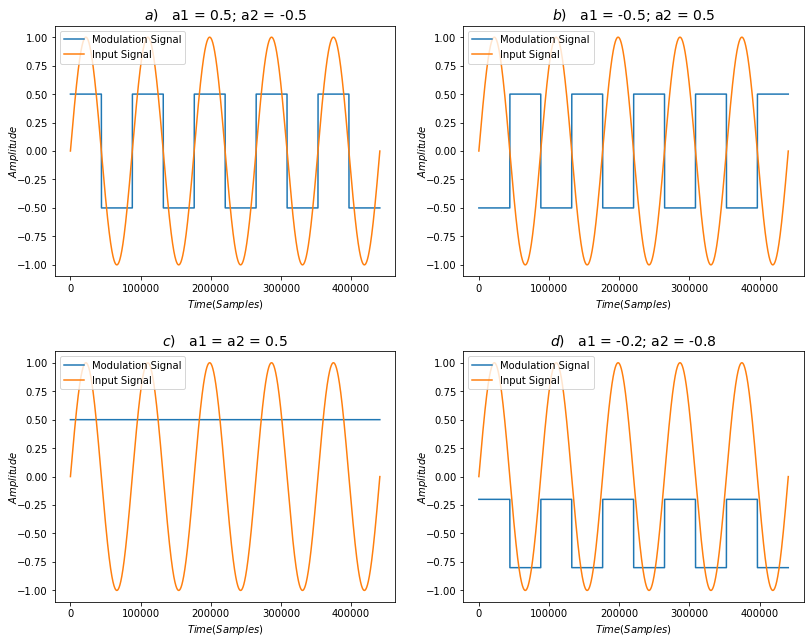

In [26]:
#Modulation Signal with different scaling factors a1 & a2

f = 0.5
sine = sin(pi*2*f*t)


figure(figsize=[13,10])

subplot(221)
a1 = 0.5
a2 = -0.5
test = (sine>=0)*a1 + (sine<0)*a2
plot(test, label ='Modulation Signal')
plot(sine, label ='Input Signal')
title('$a)$   a1 = 0.5; a2 = -0.5', fontsize = 14)
plt.xlabel('$Time (Samples)$')
plt.ylabel('$Amplitude$', labelpad = -4)
plt.legend(loc = 'upper left')

subplot(222)
a1 = -0.5
a2 = 0.5
test = (sine>=0)*a1 + (sine<0)*a2
plot(test, label ='Modulation Signal')
plot(sine, label ='Input Signal')
title('$b)$   a1 = -0.5; a2 = 0.5', fontsize = 14)
plt.xlabel('$Time (Samples)$')
plt.ylabel('$Amplitude$', labelpad = -4)
plt.legend(loc = 'upper left')

subplot(223)
a1 = 0.5
a2 = 0.5
test = (sine>=0)*a1 + (sine<0)*a2
plot(test, label ='Modulation Signal')
plot(sine, label ='Input Signal')
title('$c)$   a1 = a2 = 0.5', fontsize = 14)
plt.xlabel('$Time (Samples)$')
plt.ylabel('$Amplitude$', labelpad = -4)
plt.legend(loc = 'upper left')

subplot(224)
a1 = -0.2
a2 = -0.8
test = (sine>=0)*a1 + (sine<0)*a2
plot(test, label ='Modulation Signal')
plot(sine, label ='Input Signal')
title('$d)$   a1 = -0.2; a2 = -0.8', fontsize = 14)
plt.xlabel('$Time (Samples)$')
plt.ylabel('$Amplitude$', labelpad = -4)
plt.legend(loc = 'upper left')


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)

# Feedback Stability Test

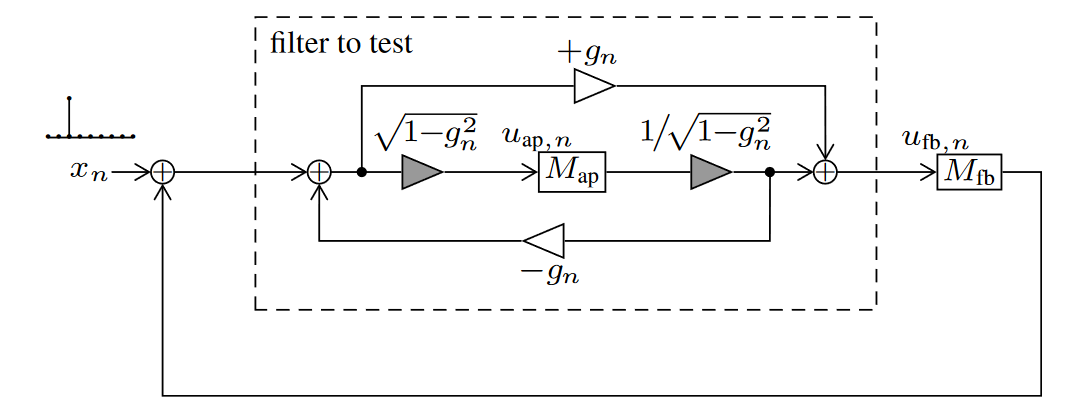

## Placing the Allpassfilters in a Feedback-Loop 

In [27]:
def apAcs(x, M, g, Mfb):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)
    
    for n in range(N):
        T1[n] = sqrt((1-g[n])/(1+g[n]))
        T2[n] = sqrt((1+g[n])/(1-g[n]))
        y[n] = u[n-Mfb] + x[n]
        v[n] = y[n] - w[n-M]* T2[n]
        w[n] = (y[n] + g[n] * v[n]) * T1[n]
        u[n] = g[n] * v[n] + w[n-M]* T2[n]
        
    return y

In [28]:
def apLTIcs(x, M, g, Mfb):
    
    y = zeros_like(x)
    v = zeros_like(x)
    u = zeros_like(x)
    
    for n in range(N):
        y[n] = u[n-Mfb] + x[n]
        v[n] = y[n] - g[n] * v[n-M]  
        u[n] = v[n-M] + v[n] * g[n]
        
    return y

In [29]:
def apNL2cs(x, M, a1, a2, Mfb):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    x2 = zeros_like(x)
    u = zeros_like(x)
    u2 = zeros_like(x)
    g = zeros_like(x)

    
    for n in range(N):
        
        x2[n] = u[n-Mfb]  + x[n]
        v[n] = x2[n] - w[n-1]
        g[n] = (v[n]>=0)*a1[n] + (v[n]<0)*a2[n]
        w[n] = g[n] * v[n-M+1]  
        u[n] = v[n-M-1] + v[n-1] * g[n-1]
        y[n] = u[n-Mfb] 
        
    return y

In [30]:
def apGNLcs(x, M, a1, a2, Mfb):
    
    y = zeros_like(x)
    x2 = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    g = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        x2[n] = u[n-Mfb] + x[n]
        v[n] = x2[n] * g[n-1] 
        g[n] = (v[n]>=0)*a1[n] + (v[n]<0)*a2[n]
        T1[n] = (1/sqrt(1-g[n-1]**2))
        T2[n] = sqrt(1-g[n-1]**2)
        w[n] = (x2[n] - g[n-1] *  (v[n] + w[n-M]*T2[n]))* T1[n]
        u[n] = w[n-M]*T2[n] + v[n]
        y[n] = u[n-Mfb]  
    return y

In [31]:
#Variable scaling factors

a1 = zeros(N)
a2 = zeros(N)

a1.fill(0.2) #static scaling factor - LTI-Case
a2.fill(0.5) #static scaling factor - LTI-Case

#a2 = (sin(pi*2*0.8*t)+1*0.5)* 0.1+0.3 
#a1 = (sin(pi*2*0.7*t)+1*0.5)* 0.1+0.5

#a2 =  ((random_sample(N)*2)-1) * 0.999
#a1 =  ((random_sample(N)*2)-1) * 0.999

#Static scaling factors as coefficients

#a1 = 0.2
#a2 = 0.5

Mfb = 101 #Feedback-Loop Delay

y = apNL2cs(x, M, a1, a2, Mfb)

## Plot the absolute value of the 10s measurement

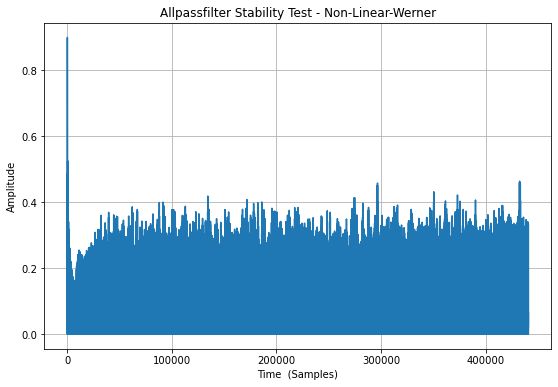

In [32]:
figure(figsize=[20,6])

subplot(121)
plt.xlabel('Time  (Samples)')
plt.ylabel('Amplitude')

plot(abs(y))

title("Allpassfilter Stability Test - Non-Linear-Werner")
grid()

## Display audio data

In [33]:
IPython.display.Audio(data=y, rate=sr) 

# Energy-Measuring

$energy = \sum \limits _{n=1} ^{N} x[n]² $

In [36]:
def energy(x):
    
    y = sum(x**2)
    
    return y

## Calculate the energies while the gains are modulated by a sine-wave

In [37]:
#Generate a sine-wave with randomized phase position
f = 1
sine = sin(pi*2*f*t+random.randint(0,pi*20)/10)*0.9999
g = sine

yA = apA(x, M, g)
yLTI = apLTI(x, M, g)


print('Input Energy =', energy(x)) #input energy
print()
print('Output Energy apA() =', energy(yA)) # output energy apA()
print('Energy Difference =',energy(x) - energy(yA)) # input energy & output energy difference
print()
print('Output Energy apLTI() =', energy(yLTI)) # output energy apLTI()
print('Energy Difference =',energy(x) - energy(yLTI)) # input energy & output energy difference

Input Energy = 1.0

Output Energy apA() = 1.0
Energy Difference = 0.0

Output Energy apLTI() = 1.000101252258467
Energy Difference = -0.00010125225846691066


## Calculate the energy 100 times and print standard deviation and mean

In [41]:
energies = zeros(100)

for n in range(100):
    noise = (random_sample(N)*2)-1
    g = noise * 0.9999 
    energies[n] = energy(apLTI(x, M, g))  # calculate the energy 100 times with randomized gains - try different structures
    
mean_value = mean(energies)
std_dev = std(energies)

mean_value, std_dev

(1.1269843736030987, 0.3106426815891459)

## Calculate the mean and standard deviations of the maxima (measured 100 times)

In [44]:
func_index = array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'V', 'LTI']) # x-Achse
repeats = 100 # number of measurements
maxarray = zeros((18, repeats))

for i in range(repeats):
    noise = (random_sample(N)*2)-1 #AP-Gain - Time-Variyng-Case
    g = noise * 0.9999  #Gain = Noise
    function_array = array([apA(x, M, g), apB(x, M, g), apC(x, M, g),apD(x, M, g),apE(x, M, g),apF(x, M, g),apG(x, M, g),apH(x, M, g),apI(x, M, g),apJ(x, M, g),apK(x, M, g),apL(x, M, g),apM(x, M, g),apN(x, M, g),apO(x, M, g),apP(x, M, g),apV(x, M, g),apLTI(x, M, g)])
    
    for n in range(18):
        maxarray[n, i] = abs(function_array[n]).max() #calculate the maximum of the output gain
        
meanarray = zeros(18)    
stdarray = zeros(18)
for n in range(18):
    stdarray[n] = std(maxarray[n]) #calculate the standard  deviation of the maxima
    meanarray[n] = mean(maxarray[n]) #calculate the mean of the maxima

figure(figsize=[20,6])
subplot(121)
plt.xlabel('Filterstructure')
plt.ylabel('Mean & Standard Deviation')
title("Average Output-Maximum (linear)")

plt.errorbar(func_index, meanarray, stdarray, linestyle='None', marker='.')

KeyboardInterrupt: 

## Find indices of differences

In [46]:
uniquestd = unique(stdarray,  return_index=True)
uniquemean = unique(meanarray,  return_index=True)

print('Mean')
print(meanarray)
print()
print(uniquemean)
print()
print(func_index[uniquemean[1][0]],uniquemean[0][0])
print(func_index[uniquemean[1][1]],uniquemean[0][1])
print()
print()
print('Standard-Deviation')
print(stdarray)
print()
print(uniquestd)
print()
print(func_index[uniquestd[1][0]],uniquestd[0][0])
print(func_index[uniquestd[1][1]],uniquestd[0][1])

NameError: name 'stdarray' is not defined

## Show average signal energy of Werner and Smiths

<ErrorbarContainer object of 3 artists>

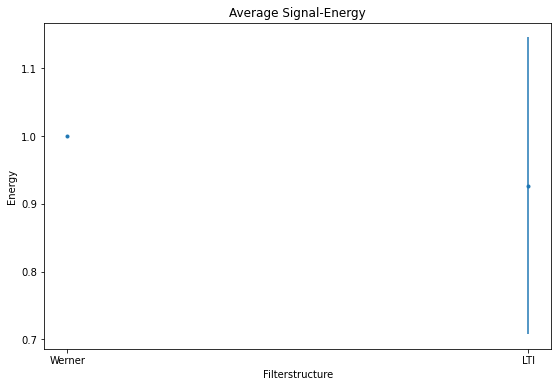

In [48]:
func_index = array(['Werner', 'LTI']) # x-Achse
repeats = 100 # number of measurements
energyarray = zeros((2, repeats))

for i in range(repeats):
    noise = (random_sample(N)*2)-1 #AP-Gain - Time-Variyng-Case
    g = noise * 0.9999  #Gain = Noise
    function_array = array([apA(x, M, g), apLTI(x, M, g)])
    
    for n in range(2):
        energyarray[n, i] = energy(function_array[n]) #calculate the energy 
        
meanarray = zeros(2)    
stdarray = zeros(2)

for n in range(2):
    stdarray[n] = std(energyarray[n]) #calculate the standard  deviation of the energy
    meanarray[n] = mean(energyarray[n]) #calculate the mean of the energy

figure(figsize=[20,6])
subplot(121)
plt.xlabel('Filterstructure')
plt.ylabel('Energy')
title("Average Signal-Energy")

plt.errorbar(func_index, meanarray, stdarray, linestyle='None', marker='.')

## Smiths structure modulated by sine wave - plot average signal energy of different frequencies

<ErrorbarContainer object of 3 artists>

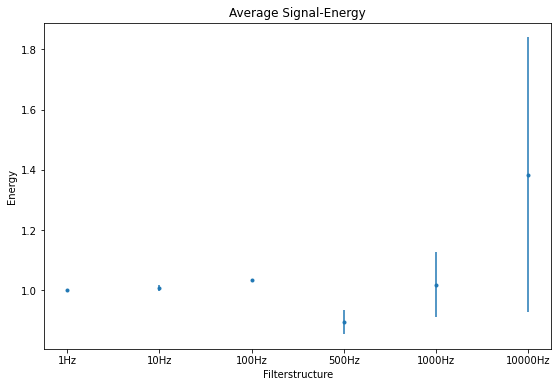

In [53]:
j = 6
f = 1

frequencies = array([1, 10, 100, 500, 1000, 10000])
func_index = array(['1Hz', '10Hz', '100Hz', '500Hz', '1000Hz', '10000Hz']) # x-Achse
repeats = 100 # number of measurements
energyarray = zeros((j, repeats))

for n in range(j):
    
    for i in range(repeats):
        sine = sin(pi*2*frequencies[n]*t+random.randint(0,pi*20)/10)*0.9999 # sinewave with randomized start-point
        g = sine
        function_array = array([apLTI(x, M, g), apLTI(x, M, g),apLTI(x, M, g), apLTI(x, M, g), apLTI(x, M, g), apLTI(x, M, g)])
        energyarray[n, i] = energy(function_array[n]) #calculate the energy   
        
    

        
meanarray = zeros(j)    
stdarray = zeros(j)

for n in range(j):
    stdarray[n] = std(energyarray[n]) #calculate the standard  deviation of the energy
    meanarray[n] = mean(energyarray[n]) #calculate the mean of the energy

figure(figsize=[20,6])
subplot(121)
plt.xlabel('Filterstructure')
plt.ylabel('Energy')
title("Average Signal-Energy")

plt.errorbar(func_index, meanarray, stdarray, linestyle='None', marker='.')

# Karplus-Strong Functions

In [ ]:
def onepole(x, k):

    y = zeros_like(x)
    for n in range(N):
        
        y[n] = x[n] + y[n-1]*k
    return y[n]

def trigger(length):
    y = zeros_like(x)
    noise = random_sample(length)*2-1
    y[0:length] = noise * (linspace(1, 0, length))**5
    return y

In [ ]:
def apAks(x, M, g, dl, fb, k):
    
    x2 = zeros_like(x)
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    u = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)
    
    for n in range(N):
        T1[n] = sqrt((1-g[n])/(1+g[n]))
        T2[n] = sqrt((1+g[n])/(1-g[n]))
        
        x2[n] = x[n] + y[n-dl]
        
        v[n] = x2[n] - w[n-M]* T2[n]
        w[n] = (x2[n] + g[n] * v[n]) * T1[n]
        
        u[n] = g[n] * v[n] + w[n-M]* T2[n]
        
        y[n] = (((u[n] + y[n-1]) * 0.5)*k + u[n]*(1-k))*fb
        
    return y

In [ ]:
def apNL2ks(x, M, a1, a2, dl, fb, k):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    x2 = zeros_like(x)
    u = zeros_like(x)
    g = zeros_like(x)
    
    
    
    for n in range(N):
        
        x2[n] = x[n] + y[n-dl]
        v[n] = x2[n] - w[n-1]
        g[n] = (v[n]>=0)*a1 + (v[n]<0)*a2
        w[n] = g[n] * v[n-M+1]  
        u[n] = v[n-M-1] + v[n-1] * g[n-1]
        y[n] = (((u[n] + y[n-1]) * 0.5)*k + u[n]*(1-k))*fb
     
    return y

In [ ]:
def apNLTks(x, M, a1, a2, dl, fb, k):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    x2 = zeros_like(x)
    u = zeros_like(x)
    g = zeros_like(x)
    
    
    
    for n in range(N):
        
        x2[n] = x[n] + y[n-dl]
        v[n] = x2[n] - w[n-1]
        g[n] = (v[n]>=0)*a1[n] + (v[n]<0)*a2[n]
        w[n] = g[n] * v[n-M+1]  
        u[n] = v[n-M-1] + v[n-1] * g[n-1]
        y[n] = (((u[n] + y[n-1]) * 0.5)*k + u[n]*(1-k))*fb
     
    return y, g, v

In [ ]:
def apGNLks(x, M, a1, a2, dl, fb, k):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    x2 = zeros_like(x)
    u = zeros_like(x)
    g = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)
    
    
    for n in range(N):
        
        x2[n] = x[n] + y[n-dl]
        v[n] = x2[n] * g[n-1] 
        g[n] = (v[n]>=0)*a1 + (v[n]<0)*a2
        T1[n] = (1/sqrt(1-g[n-1]**2))
        T2[n] = sqrt(1-g[n-1]**2)
        w[n] = (x2[n] - g[n-1] *  (v[n] + w[n-M]*T2[n]))* T1[n]
        u[n] = w[n-M]*T2[n] + v[n]
        y[n] = (((u[n] + y[n-1]) * 0.5)*k + u[n]*(1-k))*fb
     
    return y